## Método de Gumbel: modela eventos extremos.

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.66
Probabilidade de atingir ou exceder X: 0.66
Probabilidade de atingir ou ficar abaixo de X: 0.34
Proporção de valores menores ou iguais a X: 0.34
Valores menores que X: 42.00
Proporção de valores menores que X: 0.31

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00


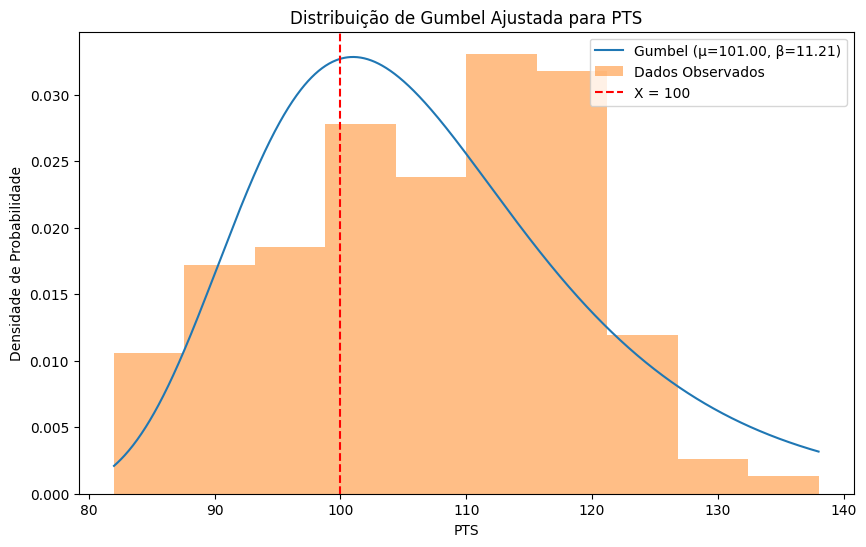

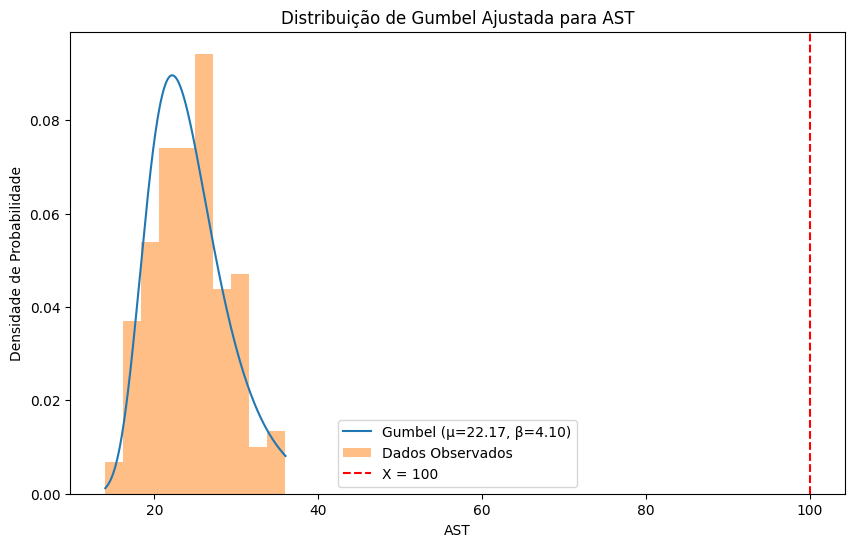

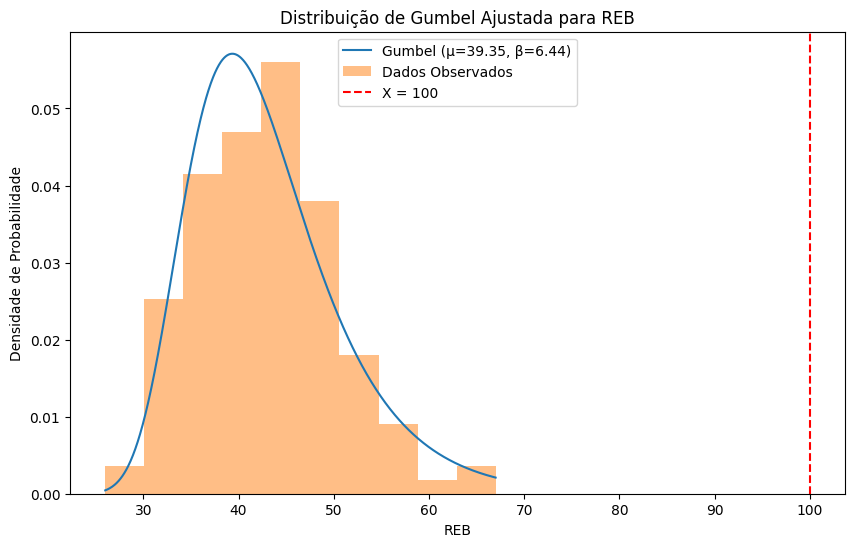

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# 1. Carregar os dados
df = pd.read_csv('charlotte_hornets_games_transformed.csv')

# 2. Selecionar as colunas de interesse
columns_of_interest = ['PTS', 'AST', 'REB']
data = df[columns_of_interest]

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valor de X para as perguntas guia
X = 100  # Exemplo: 100 pontos, 25 assistências, 50 rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(data, "PTS", X)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(data, "AST", X)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(data, "REB", X)

# Exibir resultados para X = 100
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para X = 100
plot_gumbel(data, "PTS", mu_pts, beta_pts, X)
plot_gumbel(data, "AST", mu_ast, beta_ast, X)
plot_gumbel(data, "REB", mu_reb, beta_reb, X)

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.00
Probabilidade de atingir ou exceder X: 0.00
Probabilidade de atingir ou ficar abaixo de X: 1.00
Proporção de valores menores ou iguais a X: 1.00
Valores menores que X: 135.00
Proporção de valores menores que X: 1.00


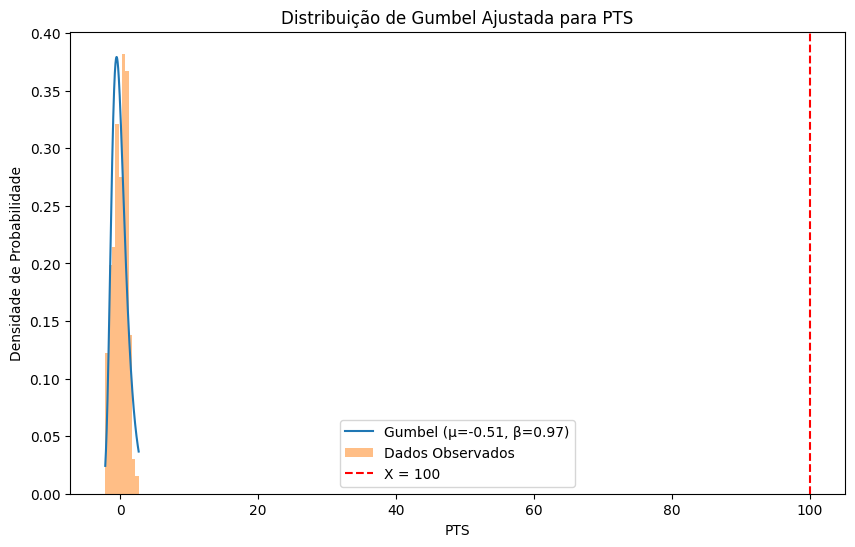

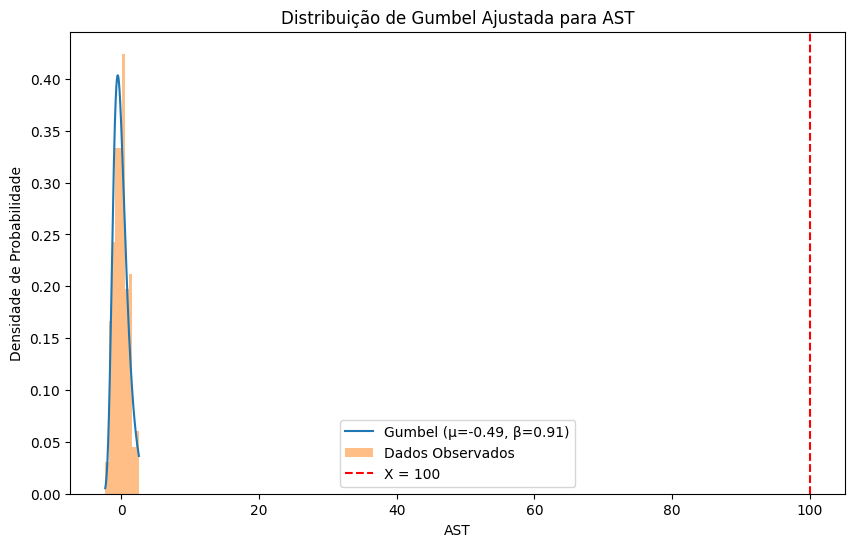

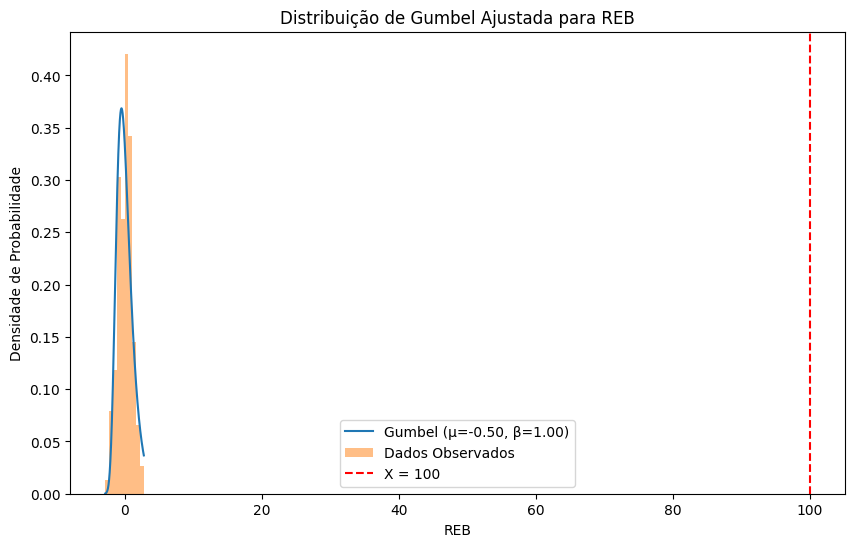

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# 1. Carregar os dados
df = pd.read_csv('charlotte_hornets_games_transformed_scaled.csv')

# 2. Selecionar as colunas de interesse
columns_of_interest = ['PTS', 'AST', 'REB']
data = df[columns_of_interest]

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valor de X para as perguntas guia
X = 100  # Exemplo: 100 pontos, 25 assistências, 50 rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(data, "PTS", X)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(data, "AST", X)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(data, "REB", X)

# Exibir resultados para X = 100
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para X = 100
plot_gumbel(data, "PTS", mu_pts, beta_pts, X)
plot_gumbel(data, "AST", mu_ast, beta_ast, X)
plot_gumbel(data, "REB", mu_reb, beta_reb, X)

Resultados para Pontuação (PTS) com X = 100:
Probabilidade de marcar acima de X: 0.66
Probabilidade de atingir ou exceder X: 0.66
Probabilidade de atingir ou ficar abaixo de X: 0.34
Proporção de valores menores ou iguais a X: 0.34
Valores menores que X: 40.00
Proporção de valores menores que X: 0.31

Resultados para Assistências (AST) com X = 25:
Probabilidade de marcar acima de X: 0.41
Probabilidade de atingir ou exceder X: 0.41
Probabilidade de atingir ou ficar abaixo de X: 0.59
Proporção de valores menores ou iguais a X: 0.59
Valores menores que X: 69.00
Proporção de valores menores que X: 0.53

Resultados para Rebotes (REB) com X = 50:
Probabilidade de marcar acima de X: 0.16
Probabilidade de atingir ou exceder X: 0.16
Probabilidade de atingir ou ficar abaixo de X: 0.84
Proporção de valores menores ou iguais a X: 0.84
Valores menores que X: 112.00
Proporção de valores menores que X: 0.85


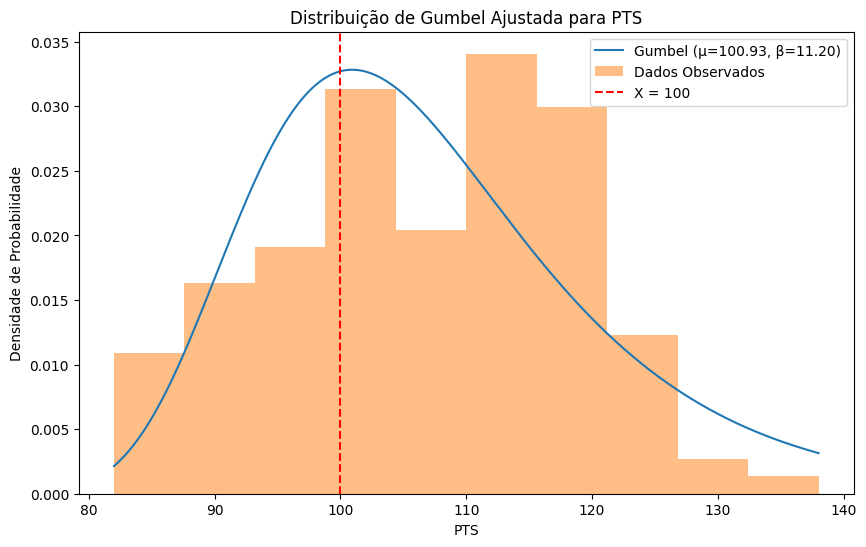

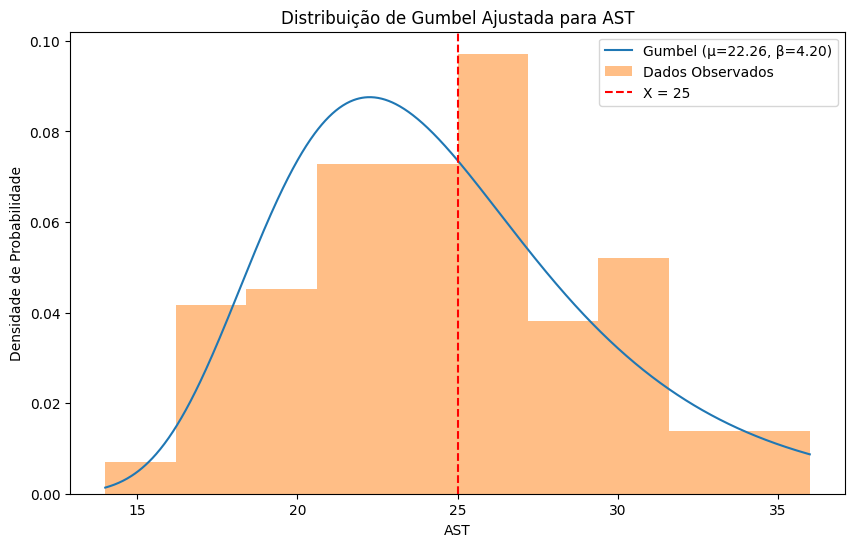

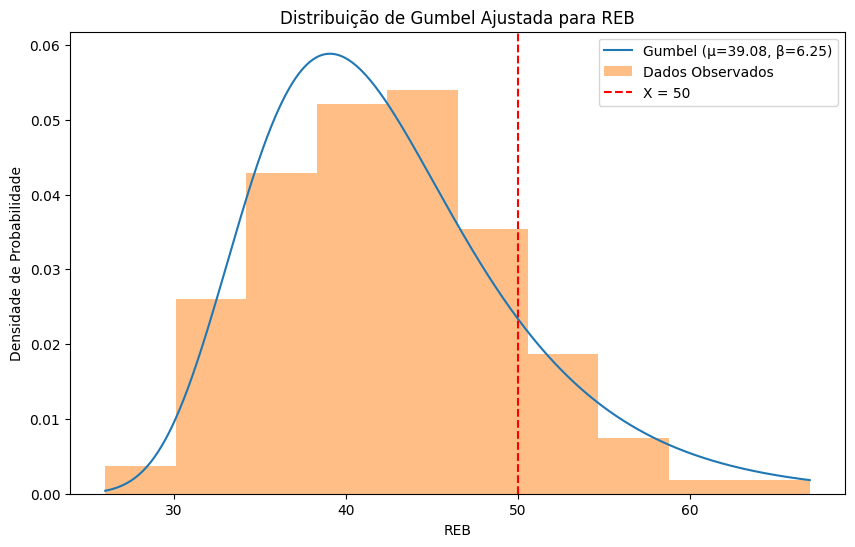

In [3]:
from nba_api.stats.endpoints import teamgamelog
from nba_api.stats.static import teams
import pandas as pd
import numpy as np
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt

# Encontrar o ID do Charlotte Hornets
hornets = teams.find_team_by_abbreviation('CHA')
hornets_id = hornets['id']

# Extrair os dados dos jogos para as temporadas 23-24 e 24-25
game_logs_23_24 = teamgamelog.TeamGameLog(team_id=hornets_id, season='2023-24').get_data_frames()[0]
game_logs_24_25 = teamgamelog.TeamGameLog(team_id=hornets_id, season='2024-25').get_data_frames()[0]

# Combinar os dados das duas temporadas
all_game_logs = pd.concat([game_logs_23_24, game_logs_24_25])

# Função para aplicar o Método de Gumbel e responder às perguntas guia
def aplicar_gumbel(dados, coluna, X):
    # Ajustar a distribuição de Gumbel para máximos
    params = gumbel_r.fit(dados[coluna])
    mu, beta = params

    # Funções para calcular probabilidades
    def probabilidade_acima_de_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_atingir_ou_exceder_X(X):
        return 1 - gumbel_r.cdf(X, loc=mu, scale=beta)

    def probabilidade_abaixo_de_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def proporcao_menores_ou_iguais_a_X(X):
        return gumbel_r.cdf(X, loc=mu, scale=beta)

    def valores_menores_que_X(X):
        # Retornar o número de valores menores que X
        return np.sum(dados[coluna] < X)

    def proporcao_menores_X(X):
        # Retornar a proporção de valores menores que X
        return np.mean(dados[coluna] < X)

    # Resultados
    resultados = {
        "Probabilidade de marcar acima de X": probabilidade_acima_de_X(X),
        "Probabilidade de atingir ou exceder X": probabilidade_atingir_ou_exceder_X(X),
        "Probabilidade de atingir ou ficar abaixo de X": probabilidade_abaixo_de_X(X),
        "Proporção de valores menores ou iguais a X": proporcao_menores_ou_iguais_a_X(X),
        "Valores menores que X": valores_menores_que_X(X),
        "Proporção de valores menores que X": proporcao_menores_X(X)
    }
    return resultados, mu, beta

# Definir valores de X para cada estatística
X_pts = 100  # Pontos
X_ast = 25   # Assistências
X_reb = 50   # Rebotes

# Aplicar o Método de Gumbel para cada estatística
resultados_pts, mu_pts, beta_pts = aplicar_gumbel(all_game_logs, "PTS", X_pts)
resultados_ast, mu_ast, beta_ast = aplicar_gumbel(all_game_logs, "AST", X_ast)
resultados_reb, mu_reb, beta_reb = aplicar_gumbel(all_game_logs, "REB", X_reb)

# Exibir resultados para Pontos (PTS)
print("Resultados para Pontuação (PTS) com X = 100:")
for pergunta, resposta in resultados_pts.items():
    print(f"{pergunta}: {resposta:.2f}")

# Exibir resultados para Assistências (AST)
print("\nResultados para Assistências (AST) com X = 25:")
for pergunta, resposta in resultados_ast.items():
    print(f"{pergunta}: {resposta:.2f}")

# Exibir resultados para Rebotes (REB)
print("\nResultados para Rebotes (REB) com X = 50:")
for pergunta, resposta in resultados_reb.items():
    print(f"{pergunta}: {resposta:.2f}")

# Função para plotar a distribuição de Gumbel
def plot_gumbel(dados, coluna, mu, beta, X):
    x = np.linspace(min(dados[coluna]), max(dados[coluna]), 1000)
    y = gumbel_r.pdf(x, loc=mu, scale=beta)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Gumbel (μ={mu:.2f}, β={beta:.2f})")
    plt.hist(dados[coluna], bins=10, density=True, alpha=0.5, label="Dados Observados")
    plt.axvline(X, color='red', linestyle='--', label=f"X = {X}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade de Probabilidade")
    plt.title(f"Distribuição de Gumbel Ajustada para {coluna}")
    plt.legend()
    plt.show()

# Plotar gráficos para cada estatística
plot_gumbel(all_game_logs, "PTS", mu_pts, beta_pts, X_pts)
plot_gumbel(all_game_logs, "AST", mu_ast, beta_ast, X_ast)
plot_gumbel(all_game_logs, "REB", mu_reb, beta_reb, X_reb)

## GAMLSS: Generalized Additive Models for Location Scale and Shape

In [4]:
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import playergamelog
from pygam import PoissonGAM, LinearGAM, s
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def get_player_gamelog(player_id, season):
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season)
    return gamelog.get_data_frames()[0]

# IDs dos jogadores
player_ids = {
    'LaMelo Ball': 1630163,
    'Moussa Diabate': 1631217,
    'Brandon Miller': 1631109
}

# Coletar dados para as temporadas 23-24 e 24-25
seasons = ['2023-24', '2024-25']
data = []

for player, pid in player_ids.items():
    for season in seasons:
        gamelog = get_player_gamelog(pid, season)
        gamelog['PLAYER'] = player
        gamelog['SEASON'] = season
        data.append(gamelog)

df = pd.concat(data)

df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values(by=['PLAYER', 'GAME_DATE'])
df = df[['PLAYER', 'SEASON', 'GAME_DATE', 'PTS', 'REB', 'AST']]
df = df.dropna()

def fit_gam(df, target, gam_type):
    X = df[['PTS', 'REB', 'AST']]
    y = df[target]
    if gam_type == 'Poisson':
        gam = PoissonGAM(s(0) + s(1) + s(2))
    else:
        gam = LinearGAM(s(0) + s(1) + s(2))
    gam.fit(X, y)
    return gam

# Exemplo para LaMelo Ball
lamelo_df = df[df['PLAYER'] == 'LaMelo Ball']
pts_gam = fit_gam(lamelo_df, 'PTS', 'Poisson')
reb_gam = fit_gam(lamelo_df, 'REB', 'Linear')
ast_gam = fit_gam(lamelo_df, 'AST', 'Linear')

def predict_and_probabilities(gam, X, target):
    predictions = gam.predict(X)
    mean = np.mean(predictions)
    median = np.median(predictions)
    mode = np.argmax(np.bincount(predictions.astype(int)))
    max_val = np.max(predictions)
    min_val = np.min(predictions)
    
    prob_above_mean = np.mean(predictions > mean)
    prob_below_mean = np.mean(predictions < mean)
    prob_above_median = np.mean(predictions > median)
    prob_below_median = np.mean(predictions < median)
    prob_above_mode = np.mean(predictions > mode)
    prob_below_mode = np.mean(predictions < mode)
    prob_above_max = np.mean(predictions > max_val)
    prob_below_min = np.mean(predictions < min_val)
    
    return {
        'predictions': predictions,
        'probabilities': {
            'above_mean': prob_above_mean,
            'below_mean': prob_below_mean,
            'above_median': prob_above_median,
            'below_median': prob_below_median,
            'above_mode': prob_above_mode,
            'below_mode': prob_below_mode,
            'above_max': prob_above_max,
            'below_min': prob_below_min
        }
    }

# Exemplo para LaMelo Ball
X_lamelo = lamelo_df[['PTS', 'REB', 'AST']]
pts_results = predict_and_probabilities(pts_gam, X_lamelo, 'PTS')
reb_results = predict_and_probabilities(reb_gam, X_lamelo, 'REB')
ast_results = predict_and_probabilities(ast_gam, X_lamelo, 'AST')

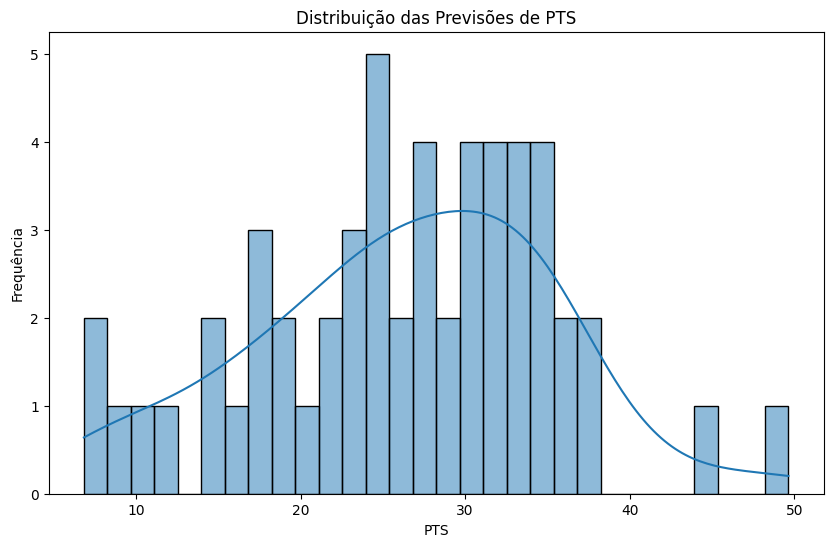

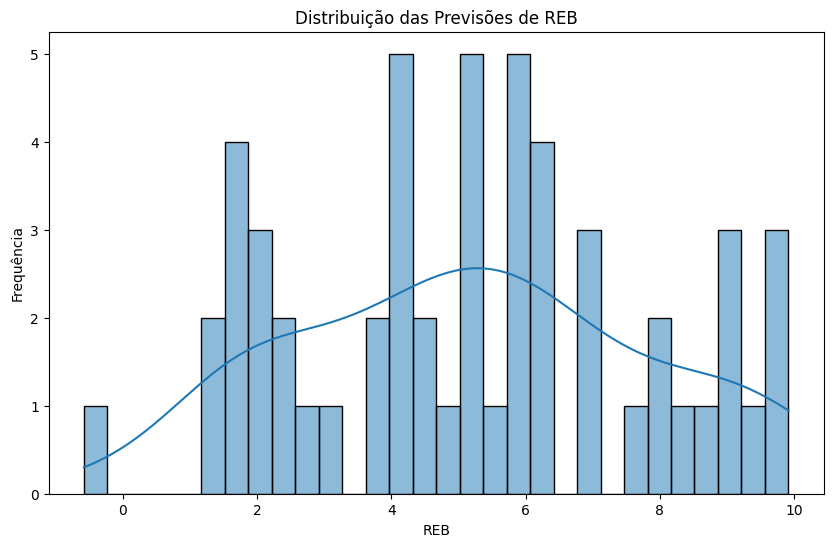

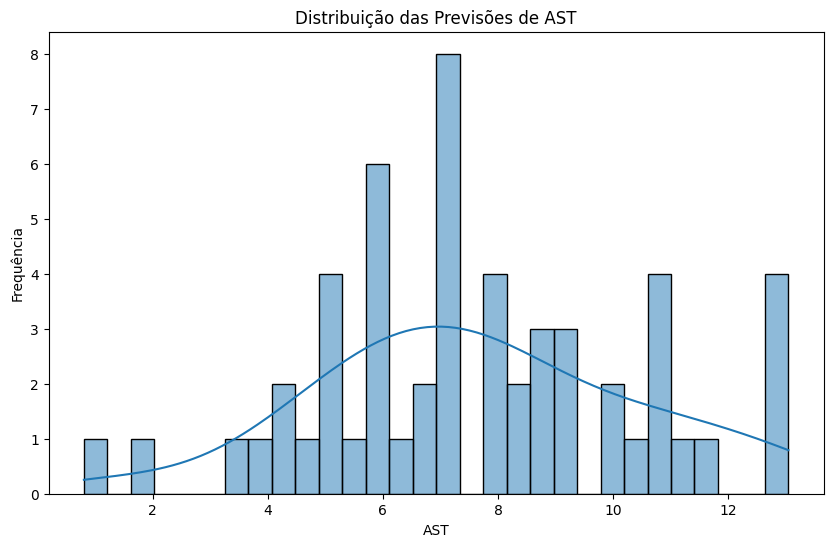

In [5]:
def plot_predictions(predictions, target):
    plt.figure(figsize=(10, 6))
    sns.histplot(predictions, kde=True, bins=30)
    plt.title(f'Distribuição das Previsões de {target}')
    plt.xlabel(target)
    plt.ylabel('Frequência')
    plt.show()

plot_predictions(pts_results['predictions'], 'PTS')
plot_predictions(reb_results['predictions'], 'REB')
plot_predictions(ast_results['predictions'], 'AST')

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# Exemplo de matriz de confusão (ajuste conforme necessário)
# plot_confusion_matrix(y_true, y_pred)

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Exemplo de curva ROC (ajuste conforme necessário)
# plot_roc_curve(y_true, y_pred)

# Regressão Linear

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn nba_api

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/fc/84/7f801a42a67b9772a883223a0a1e12069a14626c81a732bd70aac57aebc1/numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/9f/6e/264673e64001b99d747aff5a288eca82826c024437a3694e19aed1decf46/matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency 


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


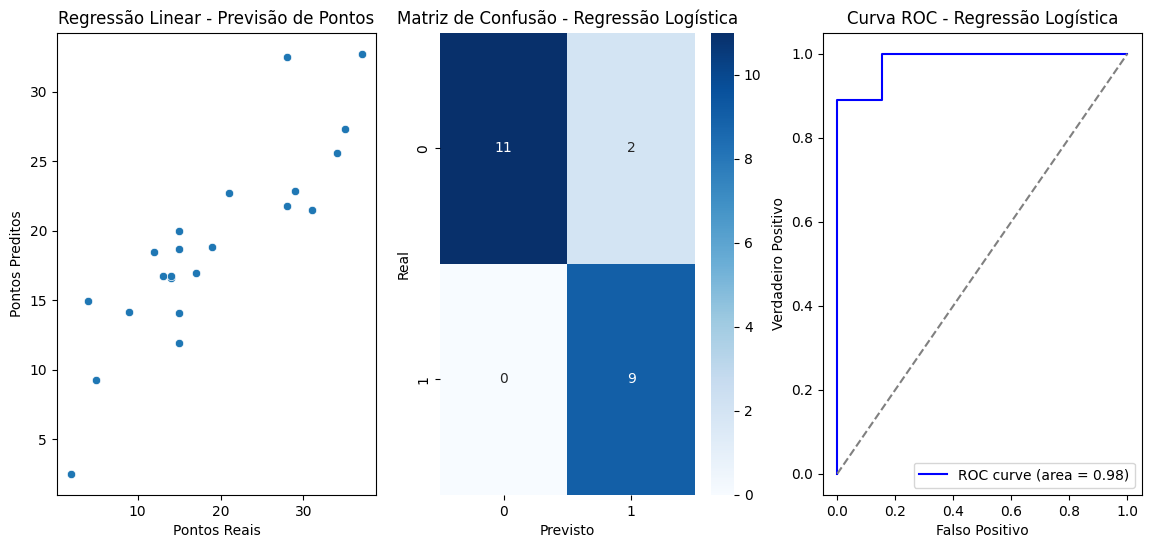

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.82      1.00      0.90         9

    accuracy                           0.91        22
   macro avg       0.91      0.92      0.91        22
weighted avg       0.93      0.91      0.91        22



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import PlayerGameLog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# IDs dos jogadores do Charlotte Hornets
players = {
    "LaMelo Ball": 1630163,
    "Moussa Diabate": 1631217,
    "Brandon Miller": 1641706,
}

# Função para obter estatísticas da API
def get_player_stats(player_id):
    log = PlayerGameLog(player_id=player_id, season="2023-24").get_data_frames()[0]
    return log[["MIN", "FGA", "TOV", "PTS", "REB", "AST"]]

# Coletar dados dos jogadores
df = pd.concat([get_player_stats(pid) for pid in players.values()])
df = df.dropna()  # Remover valores nulos

# Converter minutos em float (pode vir como string "30:45")
df["MIN"] = df["MIN"].apply(lambda x: int(x.split(":")[0]) + int(x.split(":")[1]) / 60 if ":" in str(x) else float(x))

# Definir variáveis independentes e dependentes
X = df[["MIN", "FGA", "TOV"]]  # Variáveis independentes
y_lin = df["PTS"]  # Regressão Linear (Prever pontos)
y_log = (df["PTS"] > df["PTS"].median()).astype(int)  # Regressão Logística (acima/abaixo da média)

# Dividir dados de treino e teste
X_train, X_test, y_train_lin, y_test_lin = train_test_split(X, y_lin, test_size=0.2, random_state=42)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 🔹 Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_lin)
y_pred_lin = lin_reg.predict(X_test)

# 🔹 Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_log)
y_pred_log = log_reg.predict(X_test)

# 🔹 Matriz de Confusão para Regressão Logística
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# 🔹 Curva ROC para Regressão Logística
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_log, y_prob)
roc_auc = auc(fpr, tpr)

# 📊 Visualizações
plt.figure(figsize=(14, 6))

# Gráfico 1 - Regressão Linear (Pontos Reais vs Preditos)
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_lin, y=y_pred_lin)
plt.xlabel("Pontos Reais")
plt.ylabel("Pontos Preditos")
plt.title("Regressão Linear - Previsão de Pontos")

# Gráfico 2 - Matriz de Confusão
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")

# Gráfico 3 - Curva ROC
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Regressão Logística")
plt.legend()

plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test_log, y_pred_log))


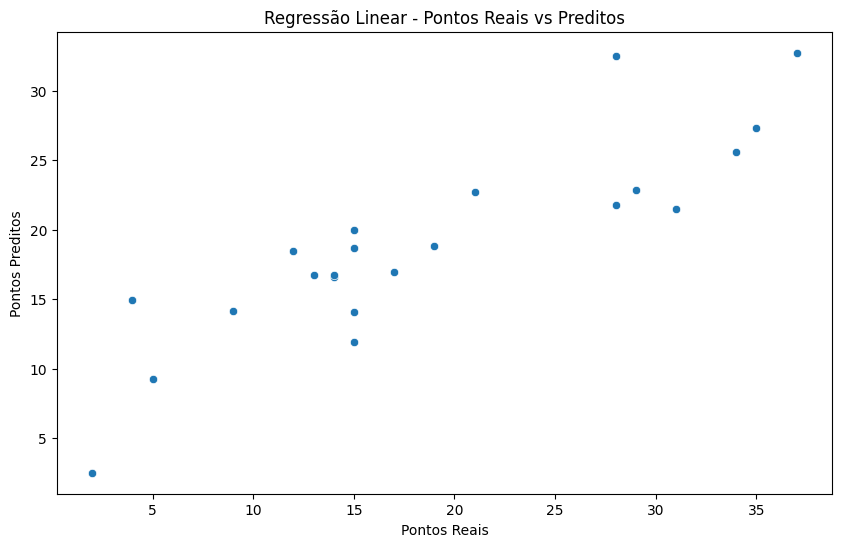

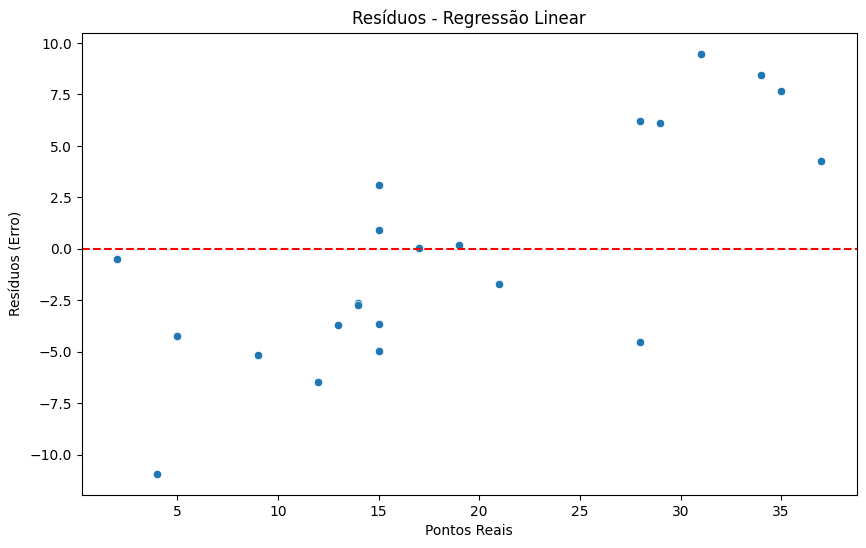

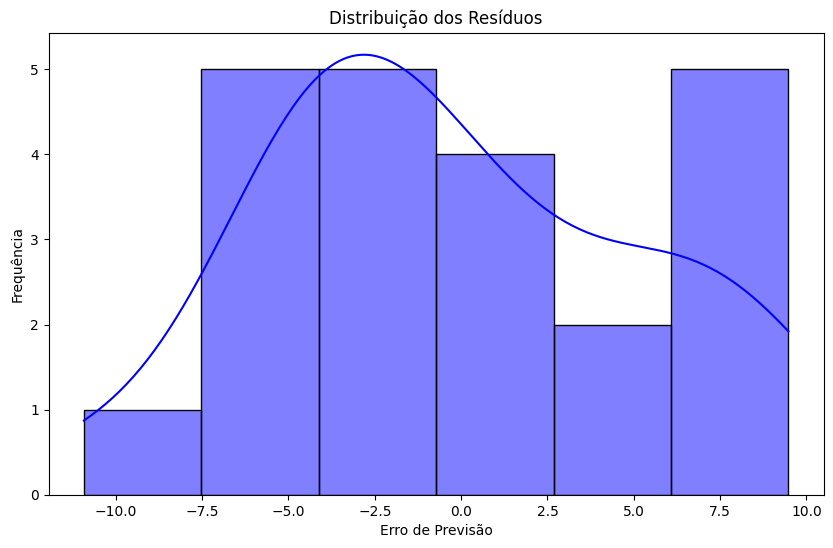

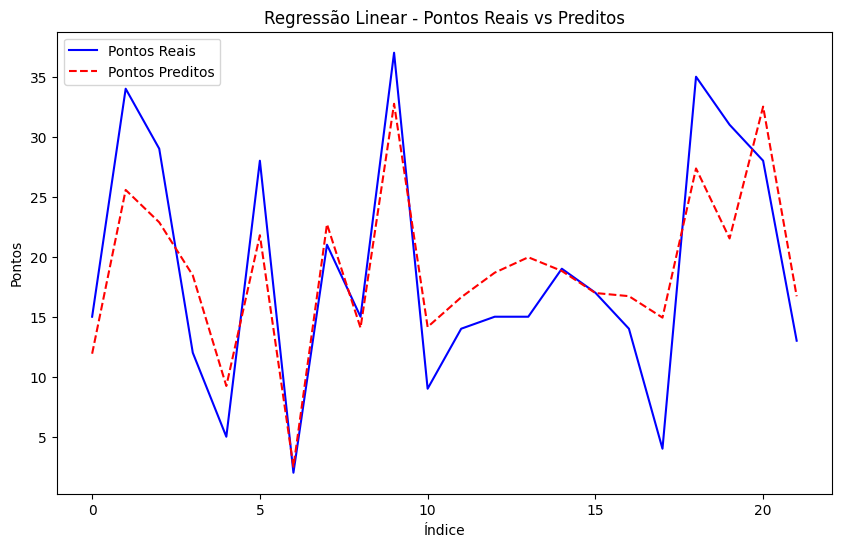

Coeficientes do Modelo de Regressão Linear:
     Coeficiente
MIN     0.106167
FGA     0.919153
TOV     0.589977

Métricas de Avaliação para Regressão Linear:
Erro Quadrático Médio (MSE): 28.13
Raiz do Erro Quadrático Médio (RMSE): 5.30
R² (Coeficiente de Determinação): 0.72


In [7]:
# 🔹 Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir dados de treino e teste para regressão linear
X_train, X_test, y_train_lin, y_test_lin = train_test_split(X, y_lin, test_size=0.2, random_state=42)

# Criar e treinar o modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train_lin)

# Fazer previsões
y_pred_lin = lin_reg.predict(X_test)

# 📊 Visualizações - Regressão Linear

# 1. Gráfico de dispersão - Pontos reais vs Preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_lin, y=y_pred_lin)
plt.xlabel("Pontos Reais")
plt.ylabel("Pontos Preditos")
plt.title("Regressão Linear - Pontos Reais vs Preditos")
plt.show()

# 2. Resíduo (Erro) - Erro de previsão vs Pontos reais
residuals = y_test_lin - y_pred_lin
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_lin, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Pontos Reais")
plt.ylabel("Resíduos (Erro)")
plt.title("Resíduos - Regressão Linear")
plt.show()

# 3. Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro de Previsão")
plt.ylabel("Frequência")
plt.show()

# 4. Gráfico de linha - Preditos vs Reais
plt.figure(figsize=(10, 6))
plt.plot(y_test_lin.values, label="Pontos Reais", color="blue")
plt.plot(y_pred_lin, label="Pontos Preditos", color="red", linestyle="--")
plt.xlabel("Índice")
plt.ylabel("Pontos")
plt.title("Regressão Linear - Pontos Reais vs Preditos")
plt.legend()
plt.show()

# 5. Coeficientes do Modelo
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=["Coeficiente"])
print("Coeficientes do Modelo de Regressão Linear:")
print(coefficients)

# 6. Métricas de Avaliação
mse = mean_squared_error(y_test_lin, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lin, y_pred_lin)

print("\nMétricas de Avaliação para Regressão Linear:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")


# Regressão Logística

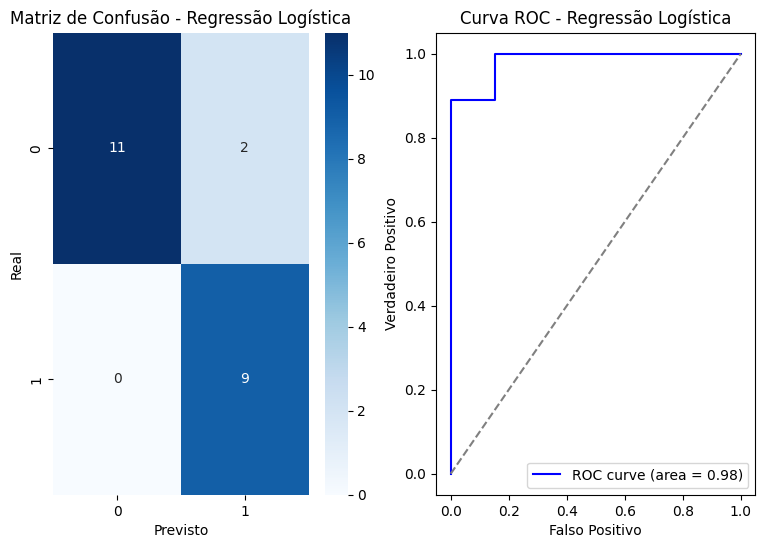

Relatório de Classificação - Regressão Logística:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.82      1.00      0.90         9

    accuracy                           0.91        22
   macro avg       0.91      0.92      0.91        22
weighted avg       0.93      0.91      0.91        22



In [6]:
# 🔹 Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Dividir dados de treino e teste para regressão logística
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Criar e treinar o modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_log)

# Fazer previsões
y_pred_log = log_reg.predict(X_test)

# 🔹 Matriz de Confusão para Regressão Logística
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# 🔹 Curva ROC para Regressão Logística
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_log, y_prob)
roc_auc = auc(fpr, tpr)

# 📊 Visualizações
plt.figure(figsize=(14, 6))

# Gráfico 1 - Matriz de Confusão
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")

# Gráfico 2 - Curva ROC
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Regressão Logística")
plt.legend()

plt.show()

# 📊 Relatório de Classificação
print("Relatório de Classificação - Regressão Logística:\n", classification_report(y_test_log, y_pred_log))
